In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from utils import *

In [2]:
# path = 'ns3NewData_/kpis_rand_maxbuff2500_01ms_ISD150_0speed_NewPL_20UEs.csv'
path = 'real_world_data/data_ready_ML.csv'
dfx = pd.read_csv(path).dropna()
dfx.drop(columns='PDCP_Thruput_DL', inplace =True)

df = dfx.copy()

# Create Binned Data as states 0,1,2,3 
df_binned = data_binning(df, binning_type = 1, bin_all_params = True)

# Remove non-binned (real) data
df = df_binned.copy()
df.drop(columns=['RSRP', 'RSRQ', 'RSSI'], inplace = True)
col_vector_P_matrix = ['RSRP_binned', 'RSRQ_binned', 'RSSI_binned', 'PCC_SINR_binned', 'PCC_PHY_Thruput_DL_binned']

Prob_matrix = create_Prob_matrix(df, col_vector_P_matrix)
Prob_matrix

Creating P() Col: P(RSRP_binned)
Creating P() Col: P(RSRQ_binned)
Creating P() Col: P(RSSI_binned)
Creating P() Col: P(PCC_SINR_binned)
Creating P() Col: P(PCC_PHY_Thruput_DL_binned)


,P(RSRP_binned),P(RSRQ_binned),P(RSSI_binned),P(PCC_SINR_binned),P(PCC_PHY_Thruput_DL_binned)
0,0.630418,0.871552,0.520095,0.476753,0.494090
1,0.184397,0.057526,0.285264,0.359338,0.437352
2,0.095351,0.043341,0.111111,0.087470,0.064618
3,0.089835,0.027581,0.083530,0.076438,0.003940


In [5]:
df_binned.corr()

,RSRP,RSRQ,RSSI,PCC_SINR,PCC_PHY_Thruput_DL,RSRP_binned,RSRQ_binned,RSSI_binned,PCC_SINR_binned,PCC_PHY_Thruput_DL_binned
RSRP,1.000000,0.524453,0.981058,0.765067,0.708951,0.939732,0.435954,0.921286,0.714996,0.607639
RSRQ,0.524453,1.000000,0.350579,0.740846,0.477885,0.468292,0.910131,0.314536,0.661273,0.333345
RSSI,0.981058,0.350579,1.000000,0.671356,0.667325,0.927111,0.273763,0.941989,0.634839,0.589840
PCC_SINR,0.765067,0.740846,0.671356,1.000000,0.862331,0.699859,0.580977,0.626899,0.925789,0.735961
PCC_PHY_Thruput_DL,0.708951,0.477885,0.667325,0.862331,1.000000,0.664045,0.313962,0.635982,0.806095,0.865616
RSRP_binned,0.939732,0.468292,0.927111,0.699859,0.664045,1.000000,0.397757,0.852844,0.631757,0.552945
RSRQ_binned,0.435954,0.910131,0.273763,0.580977,0.313962,0.397757,1.000000,0.234166,0.508999,0.186993
RSSI_binned,0.921286,0.314536,0.941989,0.626899,0.635982,0.852844,0.234166,1.000000,0.615776,0.577059
PCC_SINR_binned,0.714996,0.661273,0.634839,0.925789,0.806095,0.631757,0.508999,0.615776,1.000000,0.740227
PCC_PHY_Thruput_DL_binned,0.607639,0.333345,0.589840,0.735961,0.865616,0.552945,0.186993,0.577059,0.740227,1.000000


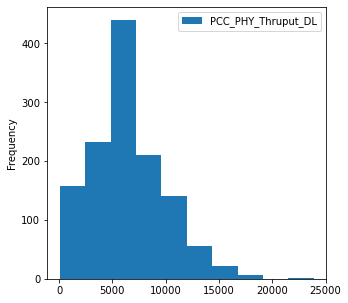

In [6]:
# dfx.drop(columns = 'PDCP_Thruput_DL', inplace = True)
# _ = dfx[['RSRP', 'RSRQ', 'RSSI']].plot(kind = 'hist', bins = 100, subplots = True, figsize = (20,10))
# _ = dfx[['PCC_SINR']].plot(kind = 'hist', bins = 10, subplots = True, figsize = (5,5))
_ = dfx[['PCC_PHY_Thruput_DL']].plot(kind = 'hist', bins = 10, subplots = True, figsize = (5,5))

In [7]:
Prob_matrix['RSRP x RSRQ'] = Prob_matrix['P(RSRP_binned)']*Prob_matrix['P(RSRQ_binned)']

In [8]:
Prob_matrix['RSRP x RSRQ'] = Prob_matrix['P(RSRP_binned)']*Prob_matrix['P(RSRQ_binned)']
Prob_matrix

,P(RSRP_binned),P(RSRQ_binned),P(RSSI_binned),P(PCC_SINR_binned),P(PCC_PHY_Thruput_DL_binned),RSRP x RSRQ
0,0.630418,0.871552,0.520095,0.476753,0.494090,0.549442
1,0.184397,0.057526,0.285264,0.359338,0.437352,0.010608
2,0.095351,0.043341,0.111111,0.087470,0.064618,0.004133
3,0.089835,0.027581,0.083530,0.076438,0.003940,0.002478


Text(0.5, 1.0, 'Thruput')

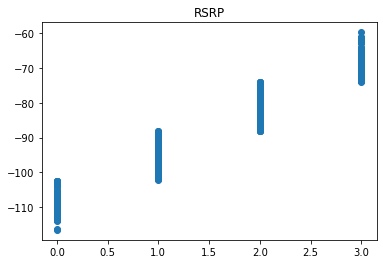

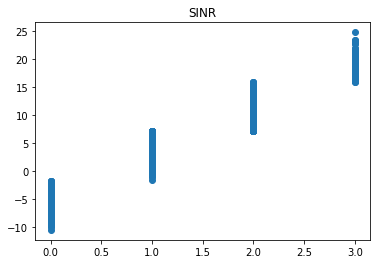

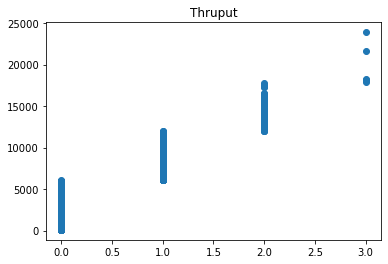

In [9]:
df = df_binned.copy()
plt.figure()
plt.scatter(df.RSRP_binned.values, df.RSRP.values)
plt.title('RSRP')

plt.figure()
plt.scatter(df.PCC_SINR_binned.values, df.PCC_SINR)
plt.title('SINR')

plt.figure()
plt.scatter(df.PCC_PHY_Thruput_DL_binned.values, df.PCC_PHY_Thruput_DL)
plt.title('Thruput')

2    605
1    456
0    111
3     97
Name: PCC_SINR_binned, dtype: int64


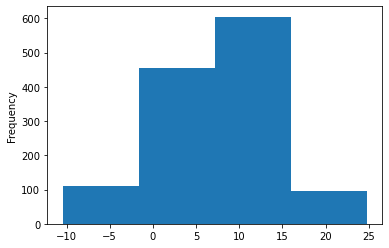

In [10]:
print(df['PCC_SINR_binned'].value_counts())
A = df.PCC_SINR.plot(kind = 'hist', bins = 4)

In [11]:
df_prob = df.copy()

def cal_Ind_Prob(arr):
    df_temp = df[df.PCC_SINR_binned == 0]
    len[df_temp]/len(df)
    

In [ ]:
df_temp = df[df.PCC_SINR_binned == 3]
len(df_temp)/len(df)

In [ ]:
df['RSRP_binned'].value_counts()

# Trying to segmentize RSRP RSSI, RSRQ based on channel conditions.
In the part above, we segmentize using pd.cut(). But in the following, there are some RF-rules based on which awe segmentize the RSRP,RSRQ and SINR.

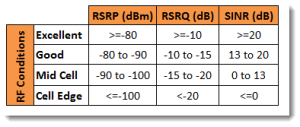

### N_RBs = RSRQ*RSSI/RSRP

In [12]:
# path = 'ns3NewData_/kpis_rand_maxbuff2500_01ms_ISD150_0speed_NewPL_20UEs.csv'
path = 'real_world_data/data_ready_ML.csv'
dfx = pd.read_csv(path).dropna()
dfx.drop(columns='PDCP_Thruput_DL', inplace =True)

# N = RSRQ*RSSI/RSRP => RSRQ+RSSI - RSRP
N = np.ceil(dfx['RSRQ']+dfx['RSSI']-dfx['RSRP']).astype(int)
dfx.insert(0, 'N_RBs', N)

# RSSI_new = dfx.RSRP - dfx.RSRQ # Removing the number of RBs. 
# dfx.insert(4, 'RSSI_new', RSSI_new)

dfx.head()

,N_RBs,RSRP,RSRQ,RSSI,PCC_SINR,PCC_PHY_Thruput_DL
0,15,-70.77,-8.66,-48.02,7.83,8737.41
1,15,-72.40,-10.56,-47.17,4.95,6969.09
2,15,-71.32,-10.13,-47.11,5.65,3874.06
3,15,-69.92,-9.62,-46.18,6.95,5575.82
4,15,-72.43,-10.30,-47.74,4.28,6114.99


<AxesSubplot:xlabel='RSRP', ylabel='RSSI'>

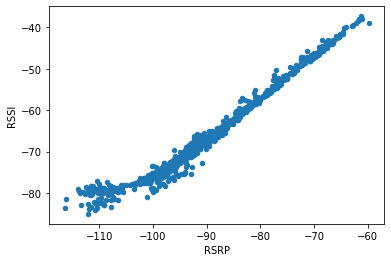

In [14]:
dfx.plot(x = 'RSRP', y = 'RSSI', kind = 'scatter')

<AxesSubplot:ylabel='Frequency'>

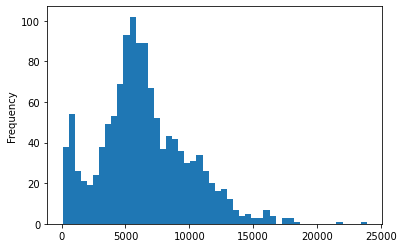

In [15]:
dfx.PCC_PHY_Thruput_DL.plot(kind = 'hist', bins = 50)

### There is a linear relationship between the RSSI and RSRP. <br>Hence we can remove the RSSI. <br>This will make our like much easier as we have one less variable to consider

In [17]:
df = dfx.copy()
df.drop(columns=['RSSI'], inplace = True)

# 0: Excellent, 1: Good, 2: Mid-cell, 3: Cell Edge
df['RSRP'] = np.where(df['RSRP'] >= -80, 0, df['RSRP'])
df['RSRP'] = np.where((df['RSRP'] < -80) & (df['RSRP'] >= -90), 1, df['RSRP'])
df['RSRP'] = np.where((df['RSRP'] < -90) & (df['RSRP'] >= -100), 2, df['RSRP'])
df['RSRP'] = np.where(df['RSRP'] <= -100 , 3, df['RSRP'])

df['RSRQ'] = np.where(df['RSRQ'] >= -10, 0, df['RSRQ'])
df['RSRQ'] = np.where((df['RSRQ'] < -10) & (df['RSRQ'] >= -15), 1, df['RSRQ'])
df['RSRQ'] = np.where((df['RSRQ'] < -15) & (df['RSRQ'] >= -20), 2, df['RSRQ'])
df['RSRQ'] = np.where(df['RSRQ'] < -20 , 3, df['RSRQ'])

df['PCC_SINR'] = np.where(df['PCC_SINR'] >= 20, 0, df['PCC_SINR'])
df['PCC_SINR'] = np.where((df['PCC_SINR'] < 20) & (df['PCC_SINR'] > 13), 1, df['PCC_SINR'])
df['PCC_SINR'] = np.where((df['PCC_SINR'] > 0) & (df['PCC_SINR'] <= 13), 2, df['PCC_SINR'])
df['PCC_SINR'] = np.where(df['PCC_SINR'] < 0 , 3, df['PCC_SINR'])

df['PCC_PHY_Thruput_DL'] = np.where(df['PCC_PHY_Thruput_DL'] < 300 , 3, df['PCC_PHY_Thruput_DL'])
df['PCC_PHY_Thruput_DL'] = np.where((df['PCC_PHY_Thruput_DL'] < 5000) & (df['PCC_PHY_Thruput_DL'] >= 300), 2, df['PCC_PHY_Thruput_DL'])
df['PCC_PHY_Thruput_DL'] = np.where((df['PCC_PHY_Thruput_DL'] < 10000) & (df['PCC_PHY_Thruput_DL'] > 5000), 1, df['PCC_PHY_Thruput_DL'])
df['PCC_PHY_Thruput_DL'] = np.where(df['PCC_PHY_Thruput_DL'] >= 10000, 0, df['PCC_PHY_Thruput_DL'])

df['PCC_PHY_Thruput_DL'] = df['PCC_PHY_Thruput_DL'].astype(int)
df['RSRP'] = df['RSRP'].astype(int)
df['RSRQ'] = df['RSRQ'].astype(int)
df['PCC_SINR'] = df['PCC_SINR'].astype(int)

df.drop(columns='N_RBs', inplace = True)
df

,RSRP,RSRQ,PCC_SINR,PCC_PHY_Thruput_DL
0,0,0,2,1
1,0,1,2,1
2,0,1,2,2
3,0,0,2,1
4,0,1,2,1
...,...,...,...,...
1265,1,0,2,0
1266,2,0,2,1
1267,1,0,2,0
1268,2,0,2,1


<AxesSubplot:>

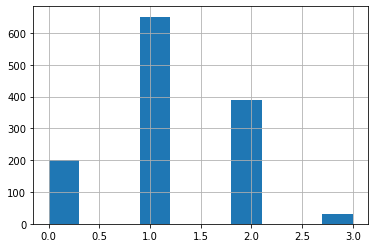

In [18]:
df.PCC_PHY_Thruput_DL.hist()

In [20]:
df.head(2)

,RSRP,RSRQ,PCC_SINR,PCC_PHY_Thruput_DL
0,0,0,2,1
1,0,1,2,1


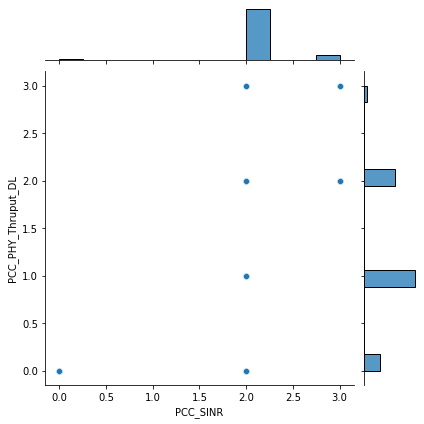

In [28]:
_ = sns.jointplot(x = 'PCC_SINR', y ='PCC_PHY_Thruput_DL', data = df)